In [1]:
from __future__ import print_function

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

now = datetime.datetime.now

In [3]:
batch_size = 128 # no.of elements to be used for one iteration
num_classes =10   # no. of classes for training
epochs = 8        # how many times the whole dataset should be iterated

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
filters = 32
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size 
kernel_size = 8  

if K.image_data_format() == 'channels_first':  # channels mean no. of color channels of the image
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)    # tensorflow uses channels_last config by default

In [4]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    # compile the model
    # you can chnage the parameters in this compile function
    # custom funtions for loss and opitizer can be used: ref to keras documentation for more
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    # Train the model
    t = now()
    hist = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Training time: %s' % (now() - t))
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    return hist

In [6]:
# Get the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
classes = np.unique(y_train)
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

Unique output classes :  [0 1 2 3 4 5 6 7 8 9]
Total number of outputs :  10


In [8]:
# create two datasets
# one with digits below 5 
x_train = x_train[y_train < 5]
y_train = y_train[y_train < 5]
x_test = x_test[y_test < 5]
y_test = y_test[y_test < 5]
print(x_train.shape)
print(x_train[y_train<5].shape)


(30596, 28, 28)
(30596, 28, 28)


In [9]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(filters, kernel_size=(3,3),padding='valid',input_shape=input_shape),Activation('relu'),
    Conv2D(filters, kernel_size=(3,3),padding='valid'),Activation('relu'),
    Conv2D(filters, kernel_size=(3,3),padding='valid'),Activation('relu'),
    Conv2D(filters, kernel_size=(3,3),padding='valid'),Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

In [10]:
# create complete model
model = Sequential(feature_layers+classification_layers)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 32)        9

In [12]:
# train model for 5-digit classification [0..4]
h_org = train_model(model,(x_train, y_train), (x_test, y_test), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/8
240/240 [==============================] - 99s 407ms/step - loss: 2.3189 - accuracy: 0.0417 - val_loss: 2.2865 - val_accuracy: 0.1771
Epoch 2/8
240/240 [==============================] - 97s 404ms/step - loss: 2.2829 - accuracy: 0.1504 - val_loss: 2.2425 - val_accuracy: 0.4744
Epoch 3/8
240/240 [==============================] - 97s 404ms/step - loss: 2.2370 - accuracy: 0.2708 - val_loss: 2.1710 - val_accuracy: 0.5209
Epoch 4/8
240/240 [==============================] - 99s 411ms/step - loss: 2.1582 - accuracy: 0.3249 - val_loss: 2.0308 - val_accuracy: 0.5028
Epoch 5/8
240/240 [==============================] - 101s 420ms/step - loss: 2.0047 - accuracy: 0.3412 - val_loss: 1.7636 - val_accuracy: 0.5055
Epoch 6/8
240/240 [==============================] - 97s 404ms/step - loss: 1.7656 - accuracy: 0.3597 - val_loss: 1.4453 - val_accuracy: 0.6060
Epoch 7/8
240/240 [==============================] - 97s 404ms/

In [13]:
print(type(h_org))
print(h_org.history.keys())
print(model.metrics_names)

<class 'tensorflow.python.keras.callbacks.History'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
['loss', 'accuracy']


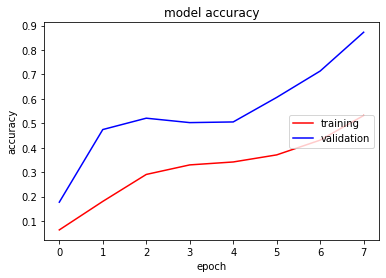

In [14]:
# plot accuracy over the epochs
from matplotlib import pyplot as plt
plt.plot(h_org.history['accuracy'],'r')
plt.plot(h_org.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()

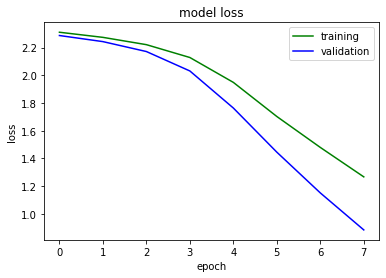

In [15]:
# Behviour of loss over the epochs

plt.plot(h_org.history['loss'],'g')
plt.plot(h_org.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [17]:
# freeze feature layers and rebuild model
# defining and segregating the two groups of layers: non-trainable (3 Conv Layers) and 
#trainable (1 Conv layer and 2 dense layers)

# marking layers which are not to be trained
model.get_layer('conv2d').trainable = False
model.get_layer('conv2d_1').trainable = False
model.get_layer('conv2d_2').trainable = False


In [18]:
#running the model on Fashion Mnist data 
from keras.datasets import fashion_mnist

In [19]:
# Get the dataset

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data() 	#Keras function

print ("fashion_mnist data downloaded...")

4423680/4422102 [==============================] - 0s 0us/step
fashion_mnist data downloaded...


In [20]:
classes = np.unique(Y_train)
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

Unique output classes :  [0 1 2 3 4 5 6 7 8 9]
Total number of outputs :  10


In [21]:
# create two datasets
# one with digits below 5 
x_train_fs = X_train[Y_train >= 5]
y_train_fs = Y_train[Y_train >= 5] - 5
x_test_fs = X_test[Y_test >= 5]
y_test_fs = Y_test[Y_test >= 5] - 5 


In [22]:
print(x_train_fs.shape)
print(x_test_fs.shape)

(30000, 28, 28)
(5000, 28, 28)


In [23]:
# transfer: train dense layers for new classification task
h_retr = train_model(model,(x_train_fs, y_train_fs),(x_test, y_test),num_classes)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5139 test samples
Epoch 1/8
235/235 [==============================] - 39s 166ms/step - loss: 2.4764 - accuracy: 0.1583 - val_loss: 0.9462 - val_accuracy: 0.8463
Epoch 2/8
235/235 [==============================] - 39s 167ms/step - loss: 2.1871 - accuracy: 0.1802 - val_loss: 1.0293 - val_accuracy: 0.7963
Epoch 3/8
235/235 [==============================] - 38s 163ms/step - loss: 2.0032 - accuracy: 0.2062 - val_loss: 1.1061 - val_accuracy: 0.7412
Epoch 4/8
235/235 [==============================] - 38s 163ms/step - loss: 1.8651 - accuracy: 0.2391 - val_loss: 1.1708 - val_accuracy: 0.6916
Epoch 5/8
235/235 [==============================] - 39s 166ms/step - loss: 1.7408 - accuracy: 0.2845 - val_loss: 1.2261 - val_accuracy: 0.6458
Epoch 6/8
235/235 [==============================] - 39s 165ms/step - loss: 1.6251 - accuracy: 0.3364 - val_loss: 1.2796 - val_accuracy: 0.6005
Epoch 7/8
235/235 [==============================] - 39s 165ms/s

In [24]:
print(h_retr.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


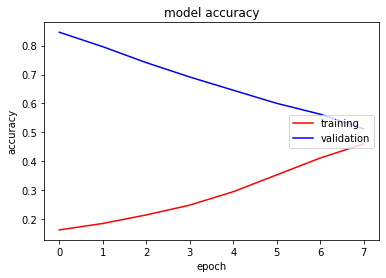

In [25]:
# plot accuracy over the epochs
from matplotlib import pyplot as plt
plt.plot(h_retr.history['accuracy'],'r')
plt.plot(h_retr.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()

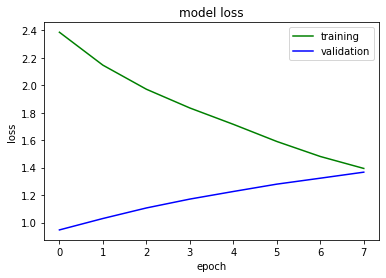

In [26]:
# Behviour of loss over the epochs
plt.plot(h_retr.history['loss'],'g')
plt.plot(h_retr.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

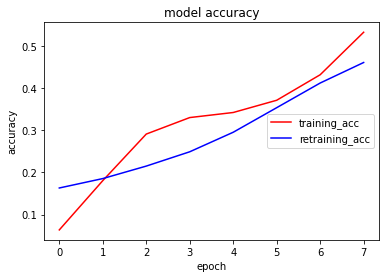

In [27]:
# Let's plot the accuracy of training and retrain over the epochs

# plot accuracy over the epochs
from matplotlib import pyplot as plt
plt.plot(h_org.history['accuracy'],'r')
plt.plot(h_retr.history['accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_acc', 'retraining_acc'], loc='center right')
plt.show()